@Uzma_Jawed

# **📉 Gradient Descent with Calculus (Basic Introduction)**

## **1. What is Gradient Descent?**
A simple optimization algorithm that uses **derivatives** to find the minimum of a function (used to minimize loss in ML models).

### **Key Idea**
- Start at a random point on the function
- Calculate the **derivative** (slope) at that point
- Move in the **opposite direction** of the slope (since we want to go downhill)
- Repeat until reaching the minimum

---

## **2. Calculus Basics Needed**
### **Derivative = Slope of a Function**
- Tells us how fast the function is changing at any point
- Example:  
  - \( f(x) = x^2 \)  
  - \( f'(x) = 2x \) *(derivative, tells us the slope at any x)*

### **Why Derivatives Matter in Gradient Descent**
- The derivative tells us **which direction to move** to minimize the function
- The **steeper the slope**, the bigger the step we take

---

## **3. Simple Example: Minimizing \( f(x) = x^2 \)**
Let's find the minimum (where \( x = 0 \)) using gradient descent.

### **Step-by-Step Math**
1. Start with random \( x \) (let's pick \( x = 3 \))
2. Compute derivative: \( f'(x) = 2x \)
3. Update rule:  
   \( x new = x - learning_rate * f'(x) \)  
   *(learning_rate controls step size - let's use 0.1)*
4. Repeat until convergence

**First few steps:**
1. \( x = 3 \), \( f'(3) = 6 \)  
   \( xnew = 3 - 0.1 * 6 = 2.4 \)
2. \( x = 2.4 \), \( f'(2.4) = 4.8 \)  
   \( x new = 2.4 - 0.1 * 4.8 = 1.92 \)
3. \( x = 1.92 \), \( f'(1.92) = 3.84 \)  
   \( x new = 1.92 - 0.1 * 3.84 = 1.536 \)
4. Continues approaching \( x = 0 \) (the minimum)

---

### **4. Python Implementation**
___

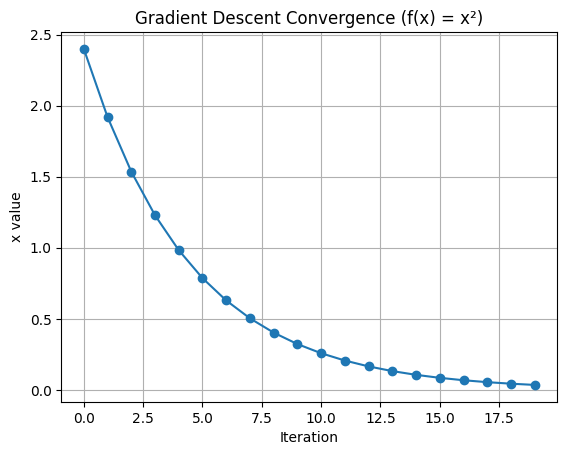

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent for f(x) = x^2
def gradient_descent(start_x, learning_rate, n_iterations):
    x = start_x
    history = []  # To track progress

    for _ in range(n_iterations):
        gradient = 2 * x  # f'(x) = 2x
        x = x - learning_rate * gradient
        history.append(x)

    return x, history

# Run GD
final_x, history = gradient_descent(start_x=3, learning_rate=0.1, n_iterations=20)

# Plot results
plt.plot(history, 'o-')
plt.title("Gradient Descent Convergence (f(x) = x²)")
plt.xlabel("Iteration"); plt.ylabel("x value")
plt.grid(True)
plt.show()

### 5. Intuition Behind Gradient Descent

*   Positive slope? Move left (decrease x)

*   Negative slope? Move right (increase x)

*   Big slope? Take bigger step

*   Small slope? Take smaller step



---


**Understanding how gradient descent behaves with different learning rates and function shapes.**

---

### 🔄 **Goal:**

Try gradient descent on the function

$$
f(x) = x^4 - 3x^2
$$

and observe how different learning rates (like `0.01` vs `0.5`) affect the optimization process.

---

### ✅ **Mathematical Derivative:**

Given:

$$
f(x) = x^4 - 3x^2
$$

$$
f'(x) = 4x^3 - 6x
$$

---

### 📘 **Concept Recap:**

Gradient descent update rule:

$$
x_{\text{new}} = x - \alpha \cdot f'(x)
$$

Where:

* $x$: current position
* $\alpha$: learning rate
* $f'(x)$: derivative (gradient)

---

### 📊 **Code: Visualizing Gradient Descent**

___

Learning rate 0.01: Final x = 1.2391, f(x) = -2.2487
Learning rate 0.1: Final x = 0.0000, f(x) = 0.0000


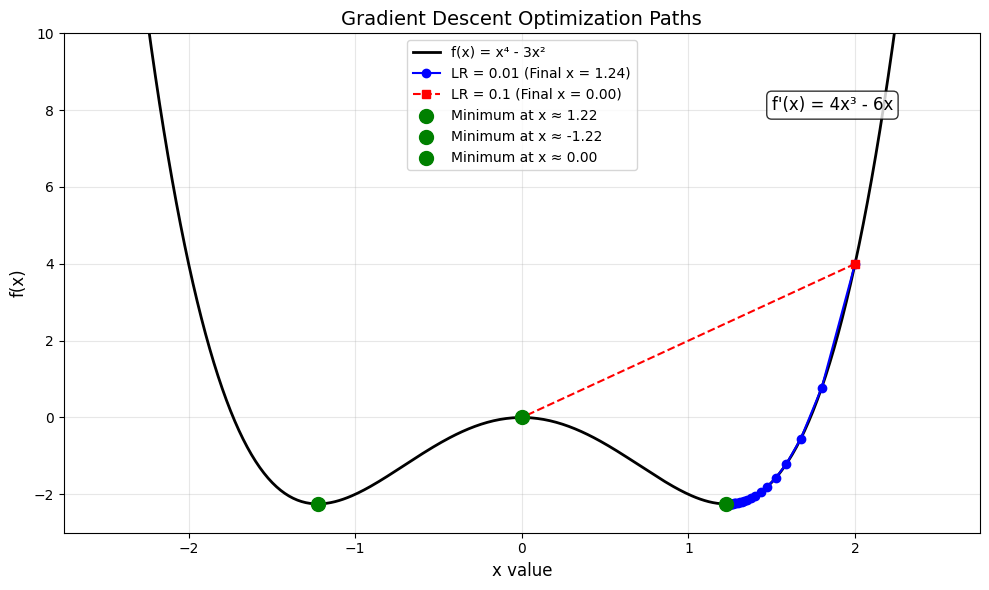

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define our function and its derivative
def f(x):
    """Function to minimize: f(x) = x⁴ - 3x²"""
    return x**4 - 3*x**2

def df(x):
    """Derivative of f(x): f'(x) = 4x³ - 6x"""
    return 4*x**3 - 6*x

def gradient_descent(learning_rate, steps, start_x):
    """
    Performs gradient descent optimization
    Args:
        learning_rate: Step size multiplier
        steps: Number of iterations
        start_x: Initial x value
    Returns:
        List of x values during optimization
    """
    x_vals = [start_x]
    x = start_x

    for _ in range(steps):
        gradient = df(x)
        x = x - learning_rate * gradient

        # Safety check for divergence
        if abs(x) > 1000:
            print(f"⚠️ Divergence detected with LR={learning_rate}! Stopping early.")
            break

        x_vals.append(x)

    return x_vals

# Set up parameters
initial_x = 2.0  # Starting point
iterations = 25   # Number of steps
learning_rates = [0.01, 0.1]  # Try different learning rates

# Run gradient descent with different learning rates
paths = []
for lr in learning_rates:
    path = gradient_descent(lr, iterations, initial_x)
    paths.append(path)
    print(f"Learning rate {lr}: Final x = {path[-1]:.4f}, f(x) = {f(path[-1]):.4f}")

# Visualization
plt.figure(figsize=(10, 6))
x_range = np.linspace(-2.5, 2.5, 400)
plt.plot(x_range, f(x_range), label="f(x) = x⁴ - 3x²", color="black", linewidth=2)

# Plot optimization paths
colors = ['blue', 'red']
linestyles = ['-', '--']
markers = ['o', 's']

for i, (path, lr) in enumerate(zip(paths, learning_rates)):
    plt.plot(path, [f(x) for x in path],
             marker=markers[i], linestyle=linestyles[i],
             color=colors[i], markersize=6,
             label=f"LR = {lr} (Final x = {path[-1]:.2f})")

# Highlight minima
minima_x = [np.sqrt(3/2), -np.sqrt(3/2), 0]  # From df(x) = 0
for x in minima_x:
    plt.scatter(x, f(x), color='green', s=100, zorder=5, label=f"Minimum at x ≈ {x:.2f}")

plt.title("Gradient Descent Optimization Paths", fontsize=14)
plt.xlabel("x value", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim(-3, 10)  # Set consistent y-axis limits

# Add derivative information
plt.annotate("f'(x) = 4x³ - 6x", xy=(1.5, 8), fontsize=12,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()